## Accessing data  Btc ,Eth

In [1]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
import matplotlib
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam,SGD
from torch.utils.data import TensorDataset,DataLoader

In [2]:
btc=pd.read_excel('btc_prices.xlsx')
btc1=pd.read_excel('btc_prices1.xlsx')

In [4]:
btc.columns

Index(['Time', 'BTC / Transactions, transfers, value, median, USD',
       'BTC / Transactions, count', 'BTC / Fees, total, USD',
       'BTC / Fees, transaction, median, USD',
       'BTC / Addresses, active, count', 'BTC / Difficulty, mean',
       'BTC / Block, count', 'BTC / Block, size, mean, bytes',
       'BTC / Supply, current', 'BTC / Transactions, transfers, count',
       'BTC / Transactions, transfers, value, adjusted, USD'],
      dtype='object')

In [67]:
btc

,Time,"BTC / Transactions, transfers, value, median, USD","BTC / Transactions, count","BTC / Fees, total, USD","BTC / Fees, transaction, median, USD","BTC / Addresses, active, count","BTC / Difficulty, mean","BTC / Block, count","BTC / Block, size, mean, bytes","BTC / Supply, current","BTC / Transactions, transfers, count","BTC / Transactions, transfers, value, adjusted, USD"
0,2011-01-01,1.834500,473,2.674577e-02,0.000000,1071,1.448416e+04,181,1.103265e+03,5029650.00,842,6.125973e+03
1,2011-01-02,1.319868,418,2.630057e-02,0.000000,1097,1.448416e+04,175,1.065291e+03,5038400.00,716,9.194506e+03
2,2011-01-03,0.014750,997,2.148349e-01,0.000000,1405,1.596848e+04,156,2.527962e+03,5046200.00,1456,9.144782e+03
3,2011-01-04,0.035874,842,1.126363e-02,0.000000,1111,1.630742e+04,141,1.777610e+03,5053250.00,1289,4.521481e+03
4,2011-01-05,0.038859,1161,2.585319e-02,0.000000,1497,1.630742e+04,154,2.459513e+03,5060950.00,1711,7.700550e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
4735,2023-12-19,14.516158,662370,1.800180e+07,15.661091,817240,6.730590e+13,162,1.695853e+06,19574911.78,1303964,6.586326e+09
4736,2023-12-20,16.940603,580281,1.868228e+07,17.203978,787679,6.730590e+13,145,1.658518e+06,19575818.03,1196080,8.206966e+09
4737,2023-12-21,17.620042,589222,1.780557e+07,16.825991,815395,6.730590e+13,146,1.708325e+06,19576730.53,1212578,6.074231e+09
4738,2023-12-22,17.513361,623750,1.395329e+07,12.976202,1012121,6.730590e+13,168,1.700745e+06,19577780.53,1294093,7.064821e+09


In [68]:
btc1

,Date,Close,Open,High,Low,Vol.,Change %
0,"Jan 01, 2011",0.3,0.3,0.3,0.3,2.82K,0.0000
1,"Jan 02, 2011",0.3,0.3,0.3,0.3,5.35K,0.0000
2,"Jan 03, 2011",0.3,0.3,0.3,0.3,1.43K,0.0000
3,"Jan 04, 2011",0.3,0.3,0.3,0.3,1.88K,0.0000
4,"Jan 05, 2011",0.3,0.3,0.3,0.3,0.36K,0.0000
...,...,...,...,...,...,...,...
4736,"Dec 20, 2023",43662.8,42259.5,44278.7,42217.2,70.19K,0.0332
4737,"Dec 21, 2023",43865.9,43660.3,44241.8,43310.2,48.96K,0.0047
4738,"Dec 22, 2023",43968.9,43865.9,44394.6,43419.3,44.50K,0.0023
4739,"Dec 23, 2023",43710.4,43968.9,43994.6,43325.7,21.29K,-0.0059


In [69]:
btc['Time']

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
4735   2023-12-19
4736   2023-12-20
4737   2023-12-21
4738   2023-12-22
4739   2023-12-23
Name: Time, Length: 4740, dtype: datetime64[ns]

In [70]:
btc['Open']=btc1['Open']
btc['High']=btc1['High']
btc['Low']=btc1['Low']
btc['Close']=btc1['Close']
btc['Volume']=btc1["Vol."]
btc['Change']=btc1['Change %']


In [71]:
btc["RRt"]=2*((btc['High']-btc['Low'])/(btc['High']+btc['Low']))
btc['Parkinson Volatility']=np.sqrt(((np.log((btc['High']/btc['Low']))**2)/(4*np.log(2))))

In [72]:
#Relative Strength Index (RSI):
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

#Exponential Moving Avgerage
def calculate_ema(data, column_name, window):
    alpha = 2 / (window + 1)
    data['EMA_' + str(window)] = data[column_name].ewm(span=window, adjust=False).mean()

#Moving Average Convergence Divergence (MACD)
def calculate_macd(data):
    # Calculate MACD using the closing prices
    macd, signal, _ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    return  macd, signal


#Bollinger Bands
def calculate_bollinger_bands(data):
    # Calculate Bollinger Bands using the closing prices
    upper_band, _, lower_band = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)
    return upper_band,lower_band
#Average True Range (ATR)
def calculate_atr(data):
    # Calculate ATR using the high, low, and close prices
    atr = talib.ATR(data['High'], data['Low'], data['Close'], timeperiod=14)
    return atr

#Stochastic Oscillator
def calculate_stochastic_oscillator(data, period_k, period_d):
    # Calculate %K
    Lowest_Low= data['Low'].rolling(window=period_k).min()
    Highest_High = data['High'].rolling(window=period_k).max()
    K = ((data['Close'] - Lowest_Low) / (Highest_High - Lowest_Low)) * 100

    # Calculate %D (3-period simple moving average of %K)
    D = K.rolling(window=period_d).mean()
    return K,D

#Williams %R
def calculate_williams_percent_r(data, period):
    # Calculate Highest High and Lowest Low over the specified period
    Highest_High = data['High'].rolling(window=period).max()
    Lowest_Low = data['Low'].rolling(window=period).min()

    # Calculate Williams %R
    R = -100 * (Highest_High - data['Close']) / (Highest_High-Lowest_Low)
    return R


#Aroon Oscillator
def calculate_Aroon_Oscillator(data,period):
    Aroon_Up = data['High'].rolling(window=period).apply(lambda x: x.argmax() / float(period) * 100, raw=True)
    Aroon_Down= data['Low'].rolling(window=period).apply(lambda x: x.argmin() / float(period) * 100, raw=True)

    # Calculate Aroon Oscillator
    Aroon_Oscillator = Aroon_Up - Aroon_Down
    return  Aroon_Oscillator

In [73]:
btc['SMA_20'] = btc['Close'].rolling(window=20).mean()
btc['RSI']=calculate_rsi(btc)
calculate_ema(btc, 'Close', window=20)
btc['MACD'],btc['Signal']=calculate_macd(btc)
btc["upper_bond"],btc['lower_bond']=calculate_bollinger_bands(btc)
btc['ATR']=calculate_atr(btc)
btc['%K'],btc['%D']=calculate_stochastic_oscillator(btc,period_k=14, period_d=3)
btc['%R']=calculate_williams_percent_r(btc,period=14)
btc[' Aroon_Oscillator']=calculate_Aroon_Oscillator(btc,period=14)




In [74]:
btc['Time'] = pd.to_datetime(btc['Time'])
btc['day'] = btc['Time'].dt.day_name()

In [75]:
btc.fillna(0)


,Time,"BTC / Transactions, transfers, value, median, USD","BTC / Transactions, count","BTC / Fees, total, USD","BTC / Fees, transaction, median, USD","BTC / Addresses, active, count","BTC / Difficulty, mean","BTC / Block, count","BTC / Block, size, mean, bytes","BTC / Supply, current",...,MACD,Signal,upper_bond,lower_bond,ATR,%K,%D,%R,Aroon_Oscillator,day
0,2011-01-01,1.834500,473,2.674577e-02,0.000000,1071,1.448416e+04,181,1.103265e+03,5029650.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Saturday
1,2011-01-02,1.319868,418,2.630057e-02,0.000000,1097,1.448416e+04,175,1.065291e+03,5038400.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Sunday
2,2011-01-03,0.014750,997,2.148349e-01,0.000000,1405,1.596848e+04,156,2.527962e+03,5046200.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Monday
3,2011-01-04,0.035874,842,1.126363e-02,0.000000,1111,1.630742e+04,141,1.777610e+03,5053250.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tuesday
4,2011-01-05,0.038859,1161,2.585319e-02,0.000000,1497,1.630742e+04,154,2.459513e+03,5060950.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,2023-12-19,14.516158,662370,1.800180e+07,15.661091,817240,6.730590e+13,162,1.695853e+06,19574911.78,...,1153.546858,1445.361651,45555.238556,38423.411444,1484.817835,44.841081,42.782215,-55.158919,-21.428571,Tuesday
4736,2023-12-20,16.940603,580281,1.868228e+07,17.203978,787679,6.730590e+13,145,1.658518e+06,19575818.03,...,1190.396799,1394.368681,45330.545997,39243.094003,1526.009418,76.590883,58.443615,-23.409117,-21.428571,Wednesday
4737,2023-12-21,17.620042,589222,1.780557e+07,16.825991,815395,6.730590e+13,146,1.708325e+06,19576730.53,...,1221.903769,1359.875698,45173.416499,39917.993501,1483.551603,81.185386,67.539117,-18.814614,-21.428571,Thursday
4738,2023-12-22,17.513361,623750,1.395329e+07,12.976202,1012121,6.730590e+13,168,1.700745e+06,19577780.53,...,1240.880412,1336.076641,45051.630839,40490.829161,1447.247917,89.661202,82.479157,-10.338798,78.571429,Friday


In [76]:
btc['Time'] = pd.to_datetime(btc['Time'])
cutoff_date_btc = pd.to_datetime('2015-11-20')
btc_ = btc[btc['Time'] >= cutoff_date_btc]
dates=btc_['Time']
dates=dates[2217:]
btc_=btc_.reset_index(drop=True)

In [77]:
dates

4001   2021-12-15
4002   2021-12-16
4003   2021-12-17
4004   2021-12-18
4005   2021-12-19
          ...    
4735   2023-12-19
4736   2023-12-20
4737   2023-12-21
4738   2023-12-22
4739   2023-12-23
Name: Time, Length: 739, dtype: datetime64[ns]

In [78]:
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
btc_['day']=btc_['day'].replace(day_mapping)
btc_=btc_.drop(columns=['Time'])


In [79]:
x=[]
for i in btc_['Volume']:
    if 'K' in i:
        z=i.split('K')
        x.append(float(z[0])*1000)
    elif 'M' in i:
        z=i.split('M')
        x.append(float(z[0])*1000000)
    elif 'B' in i:
        z=i.split('B')
        x.append(float(z[0])*1000000000)
    else:
        x.append(float(i))

btc_['Volume']=x

<AxesSubplot:>

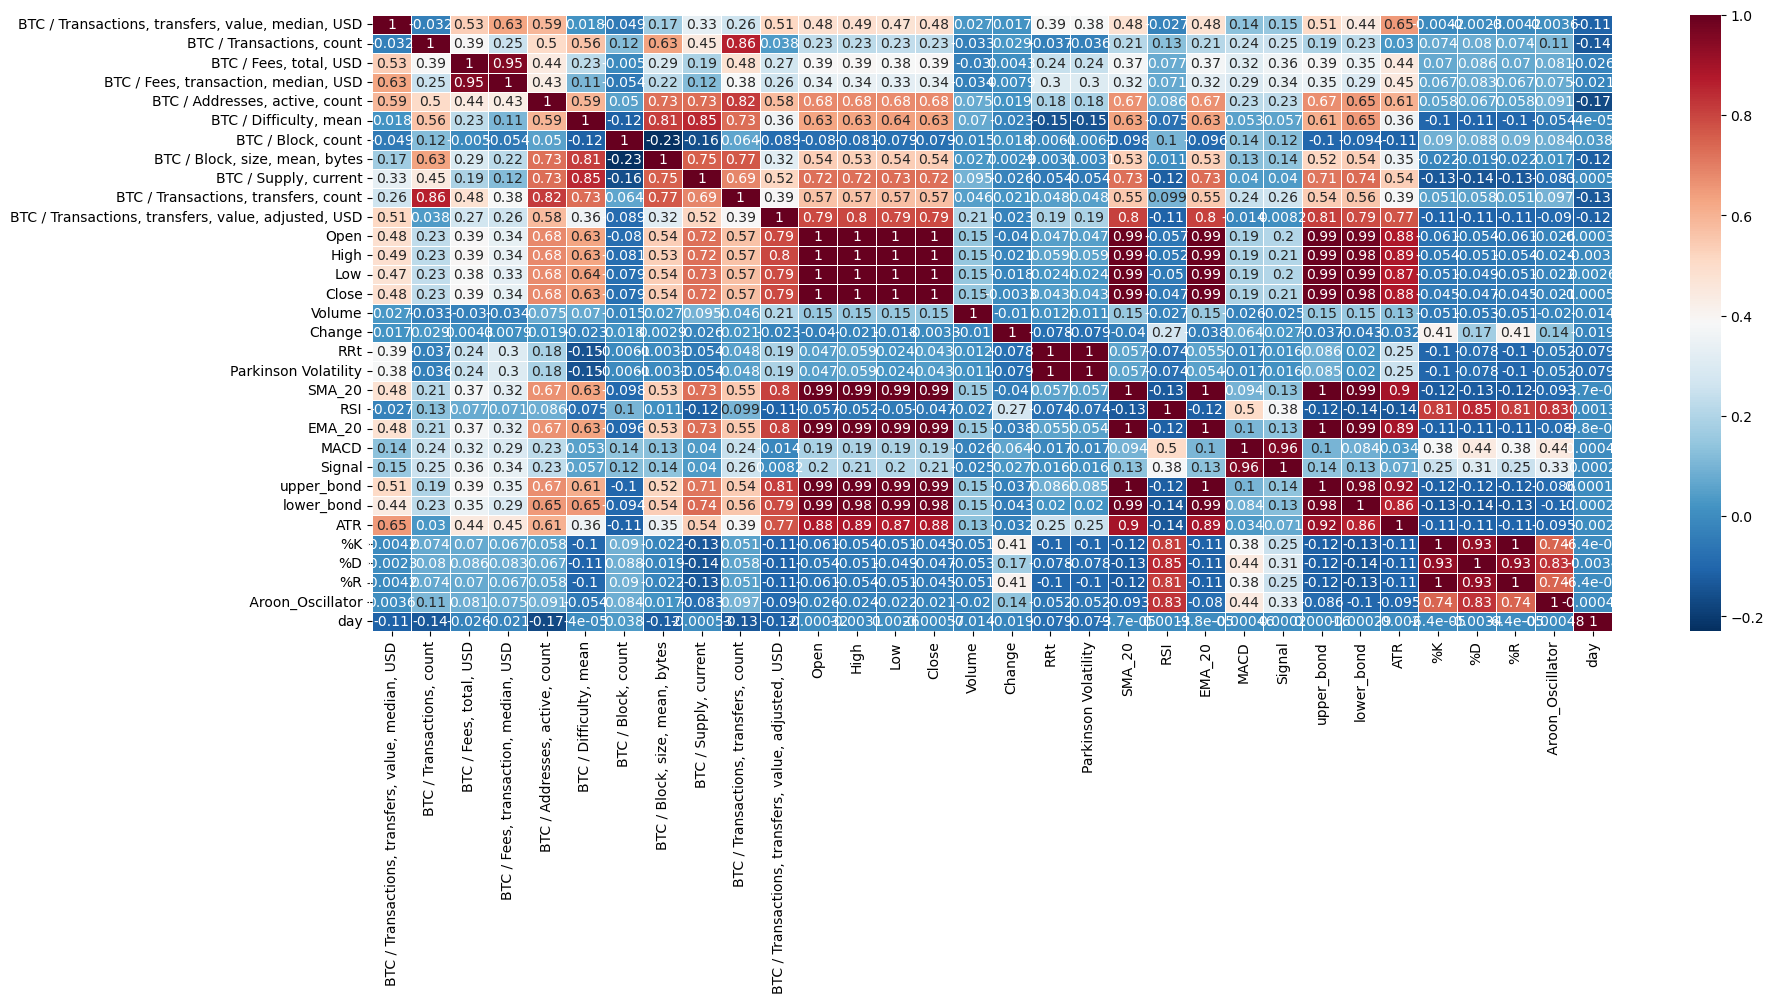

In [80]:
fig, ax = plt.subplots(figsize=(20, 8))
pearsoncorr = btc_.corr(method='pearson')
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [81]:
btc_=btc_.drop(columns=['BTC / Fees, transaction, median, USD','RRt','SMA_20','Signal','ATR','lower_bond','upper_bond','%D'])
btc_1=btc_.drop(columns=['High','Low','Open','Volume','Change'])

In [82]:
scaler = MinMaxScaler()
scaler2= StandardScaler()

In [83]:
def sequence_define(data,split_len,seq_length,index_of_Y,scaler):
    split_point=int(split_len*data.shape[0])
    data=scaler.fit_transform(data)
    data=scaler2.fit_transform(data)
    train=  data[:split_point]
    test=  data[int(split_point-seq_length):]  #tail of train data is need as the model requires the seq_length of data to predict
    X_train=[]
    Y_train=[]
    for i in range(seq_length,train.shape[0]):
        X_train.append(train[i-seq_length:i])
        Y_train.append(data[i:i+10,index_of_Y])


    X_test=[]
    Y_test=[]
    for i in range(seq_length,test.shape[0]-10):
        X_test.append(test[i-seq_length:i])
        Y_test.append(test[i:i+10,index_of_Y])
    return torch.tensor(np.array(X_train),dtype=torch.float32),torch.tensor(np.array(Y_train),dtype=torch.float32),torch.tensor(np.array(X_test),dtype=torch.float32),torch.tensor(np.array(Y_test),dtype=torch.float32)


In [84]:
X_train, Y_train,X_test, Y_test =sequence_define(btc_1,0.75,60,10,scaler)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape


(torch.Size([2157, 60, 19]),
 torch.Size([2157, 10]),
 torch.Size([729, 60, 19]),
 torch.Size([729, 10]))

In [85]:
batch_size = 50
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

## LSTM Model

In [86]:
# Define the LSTM model in PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True, dropout=0.3)
        self.lstm3 = nn.LSTM(hidden_size2, hidden_size3, batch_first=True, dropout=0.4)
        self.lstm4 = nn.LSTM(hidden_size3, output_size, batch_first=True, dropout=0.5)
        self.linear = nn.Linear(output_size, 10)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out, _ = self.lstm3(out)
        out, _ = self.lstm4(out)
        out = self.linear(out[:, -1, :])
        return out

In [87]:
input_size = X_train.shape[2]
hidden_size1, hidden_size2, hidden_size3, output_size = 50, 60, 80, 120
model = LSTMModel(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)



D:\anaconda\envs\Pytorch\lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
D:\anaconda\envs\Pytorch\lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
D:\anaconda\envs\Pytorch\lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
D:\anaconda\envs\Pytorch\lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning

In [88]:
#Defining Training loop
def training(train_loader,epochs,model,criterion,model_name):
    best_loss=float('inf')
    total_loss=0
    epochs = epochs
    for epoch in range(epochs):
        for batch_X, batch_Y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs.squeeze(), batch_Y)
            loss.backward()
            optimizer.step()
        if loss<best_loss:
            torch.save(model.state_dict(),f"{model_name}.pth")
            best_loss=loss

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.10f}')

In [89]:
def testing(data,model,model_name):
    model.load_state_dict(torch.load(f'{model_name}.pth'))
    model.eval()
# Make predictions
    with torch.no_grad():
        prediction = model(X_test)
    return prediction.numpy()

In [90]:
training(train_loader,100,model,criterion,"BTC_CLOSE")

Epoch [1/100], Loss: 0.0035051838
Epoch [2/100], Loss: 0.0070197522
Epoch [3/100], Loss: 0.0030693987
Epoch [4/100], Loss: 0.0036641071
Epoch [5/100], Loss: 0.0005460880
Epoch [6/100], Loss: 0.0010628906
Epoch [7/100], Loss: 0.0006473063
Epoch [8/100], Loss: 0.0003863878
Epoch [9/100], Loss: 0.0004963412
Epoch [10/100], Loss: 0.0007124041
Epoch [11/100], Loss: 0.0001896559
Epoch [12/100], Loss: 0.0001081934
Epoch [13/100], Loss: 0.0015810399
Epoch [14/100], Loss: 0.0002761866
Epoch [15/100], Loss: 0.0012978507
Epoch [16/100], Loss: 0.0001461869
Epoch [17/100], Loss: 0.0004749169
Epoch [18/100], Loss: 0.0000951962
Epoch [19/100], Loss: 0.0001783464
Epoch [20/100], Loss: 0.0004103144
Epoch [21/100], Loss: 0.0002341692
Epoch [22/100], Loss: 0.0004175183
Epoch [23/100], Loss: 0.0015392218
Epoch [24/100], Loss: 0.0004088197
Epoch [25/100], Loss: 0.0005749220
Epoch [26/100], Loss: 0.0003437519
Epoch [27/100], Loss: 0.0002018392
Epoch [28/100], Loss: 0.0001374646
Epoch [29/100], Loss: 0.00048

In [92]:
prediction=testing(X_test,model,"BTC_CLOSE")

In [ ]:
Y_test.shape

In [93]:
def descaler(prediction,Y_test,scaler,index,scaler2):
    standard_values=1/(scaler2.scale_[index])
    minmax_values=1/(scaler.scale_[index])
    
    prediction=prediction*standard_values*minmax_values
    
    Y_test=Y_test*standard_values*minmax_values
    return prediction,Y_test


In [94]:
def plot_price(dates,prediction,actualvalue):
    plt.plot_date(dates,prediction,'-',label='Prediction',color="red")
    plt.plot_date(dates,actualvalue,'-',label='real',color="blue")
    plt.xticks(rotation=45)
    plt.legend();

In [ ]:
len(dates)

In [ ]:
dates[:-10]

In [ ]:
prediction.shape,Y_test.shape

In [ ]:
prediction

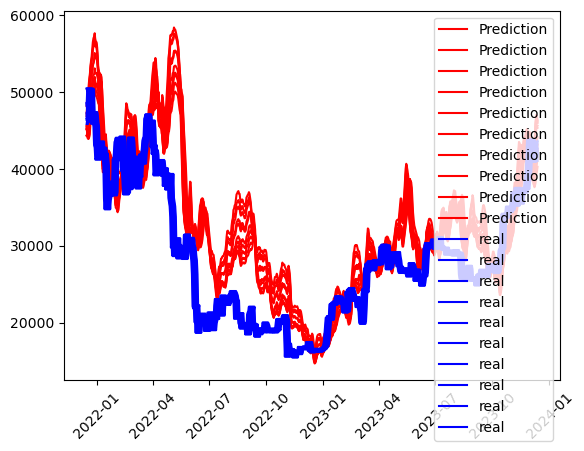

In [95]:
prediction,Y_test=descaler(prediction,Y_test,scaler,10)
plot_price(dates[:-10],prediction,Y_test)

In [ ]:
prediction,Y_test=descaler(prediction,Y_test,scaler,10)
plot_price(dates,prediction,Y_test)

###Ethereum

In [ ]:
eth=pd.read_excel('/content/eth_prices.xlsx')
eth_1=pd.read_excel('/content/eth_prices1.xlsx')

In [ ]:
eth

In [ ]:
eth_1

In [ ]:
eth['Time'] = pd.to_datetime(eth['Time'])
eth_1['Date'] = pd.to_datetime(eth_1['Date'])

In [ ]:
# Assuming 'Time' and 'Date' are datetime columns


# Merge DataFrames based on the 'Time' and 'Date' columns
eth = pd.merge(eth, eth_1[['Date', 'Open','High','Close','Low','Vol.',	'Change %']], left_on='Time', right_on='Date', how='left')

eth.drop('Date', axis=1, inplace=True)

# Rename the 'Open' column from eth_1 to avoid conflicts
eth=eth.fillna(0)
eth

In [ ]:
eth['SMA_20'] = eth['Close'].rolling(window=20).mean()
eth['RSI']=calculate_rsi(eth)
calculate_ema(eth, 'Close', window=150)
eth['MACD'],eth['Signal']=calculate_macd(eth)
eth["upper_bond"],eth['lower_bond']=calculate_bollinger_bands(eth)
eth['ATR']=calculate_atr(eth)
eth['%K'],eth['%D']=calculate_stochastic_oscillator(eth,period_k=14, period_d=3)
eth['%R']=calculate_williams_percent_r(eth,period=14)
eth[' Aroon_Oscillator']=calculate_Aroon_Oscillator(eth,period=14)
eth["RRt"]=2*((eth['High']-eth['Low'])/(eth['High']+eth['Low']))
eth['Parkinson Volatility']=np.sqrt(((np.log((eth['High']/eth['Low']))**2)/(4*np.log(2))))

In [ ]:
eth['day'] = eth['Time'].dt.day_name()

In [ ]:
eth['Time'] = pd.to_datetime(eth['Time'])
cutoff_date_eth = pd.to_datetime('2016-10-14')
eth_ = eth[eth['Time'] >= cutoff_date_eth]
dates=eth_['Time']
dates=dates[1970:]
eth_=eth_.reset_index(drop=True)

In [ ]:
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
eth_['day']=eth_['day'].replace(day_mapping)
eth_=eth_.drop(columns=['Time'])


In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
pearsoncorr = eth.corr(method='pearson')
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
eth_=eth_.drop(columns=["ETH / Supply, current",'ETH / Transactions, count','ETH / Fees, total, USD','SMA_20','upper_bond','lower_bond','MACD','%K',"%R",'RRt'])
eth_1=eth_.drop(columns=['High','Low','Open','Vol.','Change %'])

In [ ]:
scaler_2 = MinMaxScaler()

In [ ]:
X_train, Y_train,X_test, Y_test =sequence_define(eth_1,0.75,60,9,scaler_2)
X_train.shape, Y_train.shape,X_test.shape, Y_test.shape

In [ ]:
batch_size = 50
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
input_size = X_train.shape[2]
hidden_size1, hidden_size2, hidden_size3, output_size = 50, 60, 80, 120
model_2 = LSTMModel(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = Adam(model_2.parameters(), lr=0.001)

In [ ]:
training(train_loader,20,model_2,criterion,"ETH_CLOSE")

In [ ]:
prediction=testing(X_test,model_2,"ETH_CLOSE")

In [ ]:
prediction,Y_test=descaler(prediction,Y_test,scaler_2,9)
plot_price(dates,prediction,Y_test)